In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv('House Price Prediction Dataset.csv')
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [3]:
data.shape

(2000, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [5]:
# Check Data Duplicated
print(f'Check Data Duplicated pada Datframe : {data.duplicated().sum()}')

Check Data Duplicated pada Datframe : 0


In [6]:
# Check Data kosong
print(f'Check Data Duplicated pada Dataframe : \n{data.isnull().sum()}')

Check Data Duplicated pada Dataframe : 
Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [7]:
# Check Data Kosong pada seluruh DataFrame
print(f'Check Data Duplicated pada Dataframe : {data.isnull().sum().sum()}')

Check Data Duplicated pada Dataframe : 0


In [8]:
# Tampilkan column
print(data.columns)

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')


In [9]:
# Menmgambil Kolom-kolom yanmg dibutuhkan
df = data[['YearBuilt', 'Price']]

In [10]:
df

,YearBuilt,Price
0,1970,149919
1,1958,424998
2,1938,266746
3,1902,244020
4,1975,636056
...,...,...
1995,1923,295620
1996,2019,580929
1997,1903,476925
1998,1936,161119


In [11]:
# Check berapa isi dari kolom YearBuilt
print(f"Isi nilai pada kolom YearBuilt : {df['YearBuilt'].nunique()}")
print(f"Isi nilai pada kolom Price : {df['Price'].nunique()}")

Isi nilai pada kolom YearBuilt : 124
Isi nilai pada kolom Price : 1999


In [12]:
# Memunculkan nilai unik
for i in df.columns:
    print({i : df[i].unique()})

{'YearBuilt': array([1970, 1958, 1938, 1902, 1975, 1906, 1948, 1925, 1932, 2000, 1947,
       1978, 1901, 2004, 1931, 1903, 1919, 2013, 2016, 1935, 1927, 1976,
       1900, 1959, 1955, 1934, 2011, 1929, 1953, 2020, 1954, 1988, 1979,
       1957, 1982, 1964, 1968, 1950, 1921, 1987, 2006, 2008, 2015, 1952,
       1999, 1967, 1951, 1981, 1949, 1940, 1917, 1965, 1920, 1943, 2002,
       1946, 1928, 1989, 1984, 1916, 1930, 2014, 1972, 1994, 1977, 2009,
       1913, 1996, 1998, 2010, 1983, 2022, 1915, 1911, 2018, 1904, 1980,
       2021, 2005, 1973, 1942, 1944, 1908, 1961, 1956, 1924, 1914, 1905,
       2019, 1941, 1992, 1974, 1963, 2001, 1991, 1936, 1907, 1997, 2007,
       2017, 1966, 1945, 1912, 1986, 1960, 1995, 1933, 1969, 1923, 2012,
       1910, 2003, 1993, 2023, 1918, 1971, 1926, 1939, 1922, 1937, 1909,
       1990, 1962, 1985], dtype=int64)}
{'Price': array([149919, 424998, 266746, ..., 476925, 161119, 482525], dtype=int64)}


In [13]:
# Deskripsi data
df.describe()

,YearBuilt,Price
count,2000.000000,2000.000000
mean,1961.446000,537676.855000
std,35.926695,276428.845719
min,1900.000000,50005.000000
25%,1930.000000,300098.000000
50%,1961.000000,539254.000000
75%,1993.000000,780086.000000
max,2023.000000,999656.000000


<Axes: >

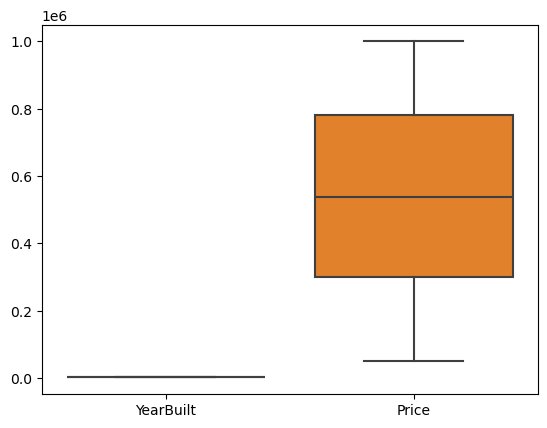

In [14]:
# Visualisai pada Kolom DF
sns.boxplot(df)

<Axes: >

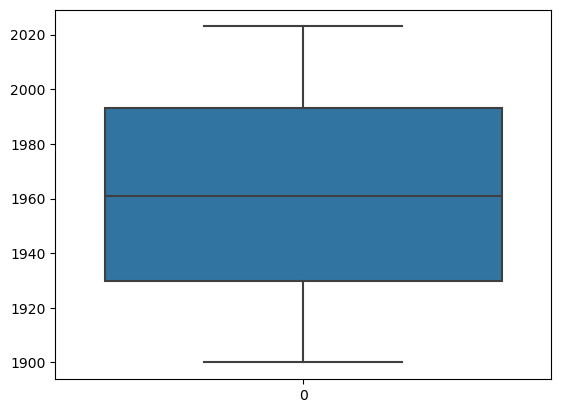

In [15]:
sns.boxplot(df['YearBuilt'])

C:\Users\BISMILLAH NAWAITU\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


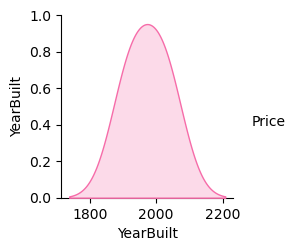

In [16]:
sns.pairplot(df, hue='Price', palette='husl')

<Axes: >

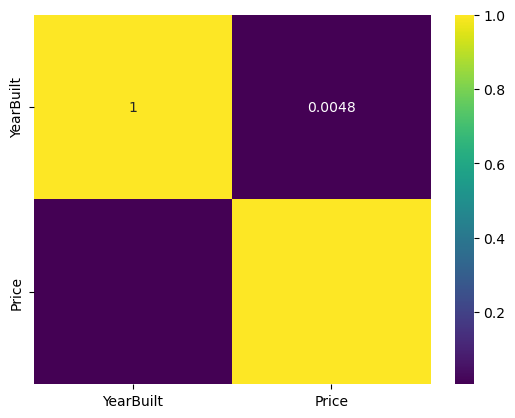

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

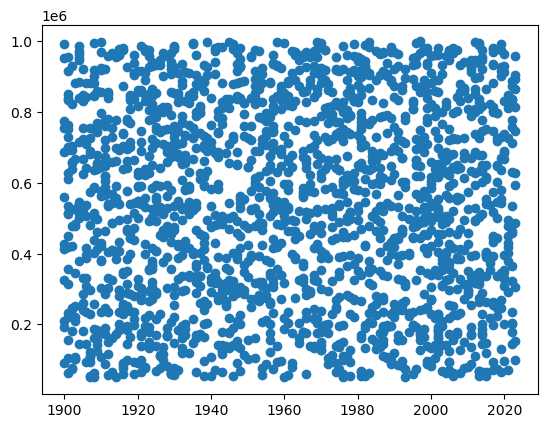

In [18]:
plt.scatter(x='YearBuilt', y='Price', data=df)

### Pemodelan data

In [47]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]

In [48]:
x

0       1970
1       1958
2       1938
3       1902
4       1975
        ... 
1995    1923
1996    2019
1997    1903
1998    1936
1999    1903
Name: YearBuilt, Length: 2000, dtype: int64

In [114]:
# Split Data Training and testing
np.random.seed(42)
train_size = int(len(x) * 0.8)
idx = np.random.permutation(len(x))

x_train, x_test, y_train, y_test = x.iloc[idx[:train_size]], x.iloc[idx[train_size:]], y.iloc[idx[:train_size]], y.iloc[idx[train_size:]]

In [115]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600,)
(400,)
(1600,)
(400,)


In [116]:
# Menghitung slope and intercept
slope = (len(x) * np.sum(x * y) - np.sum(x) * np.sum(y)) / (len(x) * np.sum(x**2)  - np.sum(x)**2)
intercept = (np.sum(y) - slope * np.sum(x)) / len(x)

In [117]:
slope

37.27988417673429

In [118]:
intercept

464554.3753010812

In [119]:
# Memprediksi
y_pred = round(intercept + slope * x_test)

In [120]:
# y_pred = y_pred.reshape(-1)
# #y_test.shape

In [121]:
### Evaluasi model
# r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
print(f"Hasil Evaluasi Model : {r2}")

Hasil Evaluasi Model : -0.0010997121442917202


In [122]:
# Mean suqred Error
mse = np.mean((y_test - y_pred)**2)
print(f"Hasil Mean Squared error : {mse}")

Hasil Mean Squared error : 72924473490.555


In [123]:
# MAE 
mae = np.mean(np.abs(y_test - y_pred))
print(f"Hasil Mean Absulote Error : {mae}")

Hasil Mean Absulote Error : 231734.005


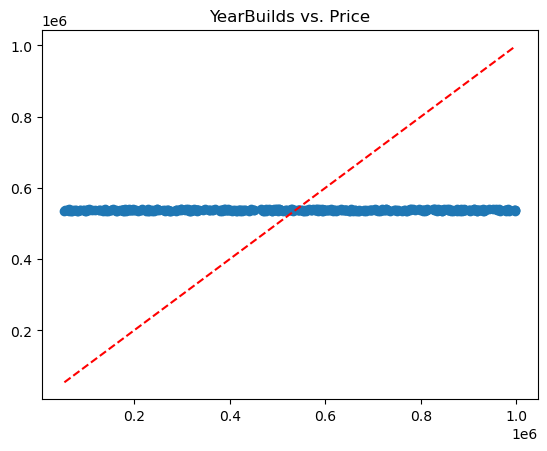

In [124]:
# Visualisasi
plt.scatter(y_test, y_predt)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title("YearBuilds vs. Price")
plt.show()